In [43]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import operator
import glob
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hac

In [44]:
# build a tokenizer, remove punctuation and single letter and finish case conversion
def build_tokenizer(content):
    tokenizer = CountVectorizer().build_tokenizer()
    tokens = tokenizer(content.lower())
    return tokens

In [45]:
# read all files in the folder
files = glob.glob("*.txt")
files_list = []
corpus_list = []
for file_name in files:
    file = open(file_name,'r')
    article = file.read()
    corpus = build_tokenizer(article)
    files_list.append(article)
    corpus_list.append(corpus)
print (corpus_list)

[['club', 'football', 'in', 'south', 'america', 'continues', 'to', 'suffer', 'from', 'the', 'continent', 'economic', 'crisis', 'the', 'best', 'players', 'are', 'lured', 'across', 'the', 'atlantic', '900', 'players', 'left', 'brazil', 'alone', 'in', '2004', 'and', 'crowds', 'are', 'low', 'with', 'money', 'tight', 'and', 'the', 'fear', 'of', 'violence', 'proving', 'powerful', 'incentive', 'to', 'stay', 'at', 'home', 'the', 'average', 'attendance', 'in', 'this', 'year', 'brazilian', 'championship', 'was', 'record', 'low', 'of', '139', 'furthermore', 'in', '2004', 'no', 'new', 'talent', 'exploded', 'on', 'the', 'continent', 'with', 'quite', 'the', 'same', 'force', 'as', 'diego', 'robinho', 'and', 'carlos', 'tevez', 'in', 'the', 'two', 'previous', 'years', 'there', 'is', 'no', 'doubt', 'that', 'the', 'highlight', 'of', 'south', 'america', 'footballing', 'year', 'has', 'to', 'come', 'from', 'the', 'international', 'game', 'there', 'were', 'some', 'dramatic', 'tournaments', 'in', '2004', 'the

In [46]:
# build lemmatizer filter
all_filter_lemmatizer_tokens = []
for corpus in corpus_list:
    filter_lemmatizer_tokens = []
    for word in corpus:
        lemmatizer = nltk.stem.WordNetLemmatizer()
        filter_lemmatizer_tokens.append(lemmatizer.lemmatize(word))
    all_filter_lemmatizer_tokens.append(filter_lemmatizer_tokens)
print (all_filter_lemmatizer_tokens)

[['club', 'football', 'in', 'south', 'america', 'continues', 'to', 'suffer', 'from', 'the', 'continent', 'economic', 'crisis', 'the', 'best', 'player', 'are', 'lured', 'across', 'the', 'atlantic', '900', 'player', 'left', 'brazil', 'alone', 'in', '2004', 'and', 'crowd', 'are', 'low', 'with', 'money', 'tight', 'and', 'the', 'fear', 'of', 'violence', 'proving', 'powerful', 'incentive', 'to', 'stay', 'at', 'home', 'the', 'average', 'attendance', 'in', 'this', 'year', 'brazilian', 'championship', 'wa', 'record', 'low', 'of', '139', 'furthermore', 'in', '2004', 'no', 'new', 'talent', 'exploded', 'on', 'the', 'continent', 'with', 'quite', 'the', 'same', 'force', 'a', 'diego', 'robinho', 'and', 'carlos', 'tevez', 'in', 'the', 'two', 'previous', 'year', 'there', 'is', 'no', 'doubt', 'that', 'the', 'highlight', 'of', 'south', 'america', 'footballing', 'year', 'ha', 'to', 'come', 'from', 'the', 'international', 'game', 'there', 'were', 'some', 'dramatic', 'tournament', 'in', '2004', 'the', 'copa

In [47]:
# remove all the stopwords int list
stopwords = text.ENGLISH_STOP_WORDS
all_filtered_stopwords_tokens = []
for corpus in all_filter_lemmatizer_tokens:
    filtered_stopwords_tokens = []
    for token in corpus:
        if not token in stopwords:
            filtered_stopwords_tokens.append(token)
    all_filtered_stopwords_tokens.append(filtered_stopwords_tokens)
print (all_filtered_stopwords_tokens)

[['club', 'football', 'south', 'america', 'continues', 'suffer', 'continent', 'economic', 'crisis', 'best', 'player', 'lured', 'atlantic', '900', 'player', 'left', 'brazil', '2004', 'crowd', 'low', 'money', 'tight', 'fear', 'violence', 'proving', 'powerful', 'incentive', 'stay', 'home', 'average', 'attendance', 'year', 'brazilian', 'championship', 'wa', 'record', 'low', '139', 'furthermore', '2004', 'new', 'talent', 'exploded', 'continent', 'quite', 'force', 'diego', 'robinho', 'carlos', 'tevez', 'previous', 'year', 'doubt', 'highlight', 'south', 'america', 'footballing', 'year', 'ha', 'come', 'international', 'game', 'dramatic', 'tournament', '2004', 'copa', 'america', 'held', 'peru', 'july', 'hardly', 'come', 'exciting', 'conclusion', 'kick', 'final', 'brazil', 'scored', 'decisive', 'equalising', 'goal', 'history', 'football', 'argentina', 'thought', 'game', 'won', 'state', 'penalty', 'adriano', '93rd', 'minute', 'blast', 'forced', 'shoot', 'earlier', 'year', 'wa', 'intense', 'disapp

In [48]:
# count the number of word in each file
counts_list = []
for filtered_stopwords_tokens in all_filtered_stopwords_tokens:
    counts = {}
    for tokens in filtered_stopwords_tokens:
        if tokens in counts:
            counts[tokens] += 1
        else:
            counts[tokens] = 1
            
    counts_list.append(counts)
print("Found %d unique terms in this corpus" % len(counts))
print (counts_list)

Found 152 unique terms in this corpus
[{'club': 1, 'football': 7, 'south': 5, 'america': 4, 'continues': 1, 'suffer': 1, 'continent': 2, 'economic': 1, 'crisis': 1, 'best': 1, 'player': 3, 'lured': 1, 'atlantic': 1, '900': 1, 'left': 1, 'brazil': 7, '2004': 5, 'crowd': 2, 'low': 2, 'money': 1, 'tight': 1, 'fear': 1, 'violence': 1, 'proving': 1, 'powerful': 1, 'incentive': 1, 'stay': 1, 'home': 2, 'average': 1, 'attendance': 1, 'year': 8, 'brazilian': 1, 'championship': 2, 'wa': 10, 'record': 1, '139': 1, 'furthermore': 1, 'new': 2, 'talent': 2, 'exploded': 1, 'quite': 1, 'force': 1, 'diego': 1, 'robinho': 1, 'carlos': 1, 'tevez': 1, 'previous': 1, 'doubt': 1, 'highlight': 4, 'footballing': 1, 'ha': 1, 'come': 5, 'international': 1, 'game': 2, 'dramatic': 1, 'tournament': 3, 'copa': 1, 'held': 2, 'peru': 1, 'july': 1, 'hardly': 1, 'exciting': 1, 'conclusion': 1, 'kick': 2, 'final': 1, 'scored': 1, 'decisive': 1, 'equalising': 1, 'goal': 4, 'history': 1, 'argentina': 6, 'thought': 2, 'wo

In [49]:
# sort the number word in each file
for courts in counts_list:
    sorted_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    for i in range(20):
        term = sorted_counts[i][0]
        count = sorted_counts[i][1]
        print( "%s (count=%d)" % ( term, count )  )
    print ("\n\n")

microsoft (count=7)
wa (count=6)
xbox (count=5)
game (count=5)
console (count=5)
machine (count=5)
gdc (count=4)
year (count=4)
news (count=4)
generation (count=3)
expected (count=3)
gamers (count=3)
developer (count=3)
sony (count=3)
nintendo (count=3)
playstation (count=3)
ea (count=3)
xenon (count=2)
likely (count=2)
unveiled (count=2)



microsoft (count=7)
wa (count=6)
xbox (count=5)
game (count=5)
console (count=5)
machine (count=5)
gdc (count=4)
year (count=4)
news (count=4)
generation (count=3)
expected (count=3)
gamers (count=3)
developer (count=3)
sony (count=3)
nintendo (count=3)
playstation (count=3)
ea (count=3)
xenon (count=2)
likely (count=2)
unveiled (count=2)



microsoft (count=7)
wa (count=6)
xbox (count=5)
game (count=5)
console (count=5)
machine (count=5)
gdc (count=4)
year (count=4)
news (count=4)
generation (count=3)
expected (count=3)
gamers (count=3)
developer (count=3)
sony (count=3)
nintendo (count=3)
playstation (count=3)
ea (count=3)
xenon (count=2)
likely 

In [50]:
# construct document-term matrix and exclude terms of length < 2
stopwords = nltk.corpus.stopwords.words('english')
vectorizer = CountVectorizer(stop_words="english",min_df = 3,ngram_range = (1,2))
matrix = vectorizer.fit_transform(files_list)
print (matrix.shape)
terms = vectorizer.get_feature_names()
print(terms)

(531, 7491)
['000', '000 allowance', '000 children', '000 including', '000 jobs', '000 new', '000 patients', '000 people', '000 privately', '000 subscribers', '000 units', '000 women', '000 year', '016', '10', '10 000', '10 billion', '10 cent', '10 days', '10 million', '10 minutes', '10 seconds', '10 times', '10 year', '10 years', '100', '100 000', '100 million', '100 years', '101', '102', '104', '105', '106', '106 900', '10th', '11', '11 cent', '110', '110 000', '110 million', '113', '113 million', '115', '116', '116 949', '11th', '12', '12 cent', '12 million', '12 month', '12 months', '12 years', '120', '120 000', '120 135', '125', '125 million', '13', '13 billion', '13 cent', '13 missed', '130', '130 million', '132', '133', '135', '135 child', '136', '14', '14 million', '140', '149', '15', '15 000', '15 cent', '15 games', '150', '150 000', '150 million', '155', '15th', '16', '16 cent', '16 trillion', '17', '17 cent', '17 weeks', '170', '175', '175 000', '17m', '17th', '18', '18 cent

In [35]:
# construct TF-IDF matrix
vectorizer_Tfidf = TfidfVectorizer(stop_words="english",min_df = 5)
tfidf_matrix = vectorizer_Tfidf.fit_transform(files_list)
print (tfidf_matrix)

  (0, 650)	0.0341898426728
  (0, 1328)	0.259569441732
  (0, 2886)	0.235898763046
  (0, 237)	0.195883469125
  (0, 766)	0.0456394417892
  (0, 3019)	0.0559800742383
  (0, 1062)	0.0330626315359
  (0, 826)	0.0427111377448
  (0, 415)	0.0336925721463
  (0, 2287)	0.0900225078393
  (0, 116)	0.0503502853123
  (0, 1809)	0.0358323578758
  (0, 463)	0.376379433274
  (0, 32)	0.192450976664
  (0, 1880)	0.0712745830782
  (0, 2019)	0.0335316793573
  (0, 3136)	0.0559800742383
  (0, 1251)	0.0519273940307
  (0, 2438)	0.0572781563997
  (0, 2328)	0.0519273940307
  (0, 2956)	0.0434715054433
  (0, 1542)	0.0635290987489
  (0, 353)	0.0373040020544
  (0, 3422)	0.109760326512
  (0, 464)	0.0548189001767
  :	:
  (530, 529)	0.0679970963189
  (530, 1254)	0.0560088938632
  (530, 756)	0.0469401687927
  (530, 3094)	0.0511475774877
  (530, 3366)	0.0616450010865
  (530, 1125)	0.108360663623
  (530, 908)	0.0573873681276
  (530, 3401)	0.0589283712483
  (530, 2815)	0.0553705524007
  (530, 18)	0.0511475774877
  (530, 1511)	0.0

In [51]:
# K-means Clustering using document-term matrix
model = KMeans(5)
model.fit(matrix.toarray())
clustering = model.labels_.tolist()
print (clustering)

[2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 4, 2, 4, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 0, 0, 4, 2, 2, 2, 4, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 4, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 3, 2, 2, 4, 0, 4, 2, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 0, 2, 0, 2, 4, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 4, 1, 2, 2, 2, 2, 0, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 2, 4, 3, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 

In [37]:
# Agglomerative Clustering using tf-idf matrix
model = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")
model.fit(tfidf_matrix.toarray()) 
clustering = model.labels_
print(clustering)

[2 0 2 1 1 2 1 1 1 2 2 0 0 0 0 0 0 2 2 0 2 0 0 1 1 1 1 0 0 1 1 1 2 2 2 2 0
 2 2 2 2 0 1 2 2 2 0 0 2 0 2 2 1 2 2 2 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1
 2 2 1 1 0 2 1 1 1 0 2 0 2 2 2 1 1 0 0 0 1 2 2 2 2 0 2 1 0 1 1 1 2 1 1 1 1
 0 1 1 1 2 0 1 2 2 0 0 1 1 1 1 1 1 0 0 1 1 1 2 2 0 1 0 1 1 1 1 1 1 1 1 1 2
 2 1 3 1 2 1 1 1 1 0 1 1 2 2 2 4 0 1 1 0 1 1 1 1 2 2 2 2 1 1 0 0 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 2 2 2 0 1 1 1 1 1 1 2 1 0 0 2 1
 1 1 1 1 1 1 2 2 2 2 1 2 0 2 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 2 0
 1 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 0 2 2 1 1 1 1 0 0 2 1 2 1 1 2 1 1 0 1 0 2
 2 2 1 1 1 2 2 2 1 1 1 1 2 1 1 0 0 0 0 2 2 0 0 1 1 1 1 0 0 0 2 1 2 0 0 2 1
 1 1 1 1 1 2 2 2 2 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 2 2 1 0 0 0 1 1 1 1
 1 1 1 1 2 2 1 1 2 1 0 1 1 1 2 2 2 2 2 2 2 1 0 0 0 0 1 1 1 1 1 1 1 0 1 2 1
 1 1 2 1 2 1 2 0 1 1 1 2 1 1 2 2 0 0 2 2 1 2 2 1 2 1 1 0 0 2 0 1 0 1 1 0 0
 1 0 2 0 1 0 0 2 2 0 0 1 1 0 0 1 2 1 1 1 2 1 2 1 1 1 2 2 1 0 0 0 2 1 1 0 0
 2 1 1 1 1 1 1 2 1 1 0 0 

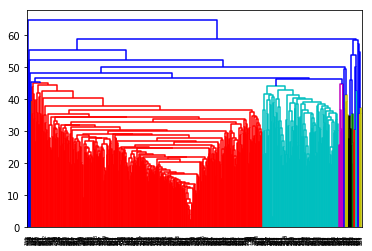

In [52]:
# Hierarchical Clustering
tree = hac.linkage(matrix.toarray(), method="complete", metric="euclidean")
plt.clf()
hac.dendrogram(tree)
plt.show()